# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Jessica Novia Nathania]
- **Email:** [6162101157@student.unpar.ac.id]
- **ID Dicoding:** [MC232D5X0443]

## Menentukan Pertanyaan Bisnis
- Bagaimana perbandingan tren jumlah pengguna sepeda di tahun 2011 dan 2012?
- Bagaimana pola perbandingan penyewaan sepeda harian?
- Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?

## Import Packages/Library yang Digunakan

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Data Wrangling



In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Gathering Data

In [35]:
day_df = pd.read_csv('/content/drive/MyDrive/Proyek Analisis Data/day.csv', delimiter=",")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Data yang ditampilkan merupakan data time series harian yang mencatat penyewaan sepeda, kondisi cuaca, dan informasi waktu lainnya.
- Kolom temp, atemp, hum, dan windspeed telah dinormalisasi, yang berarti nilai-nilainya berada dalam rentang tertentu (biasanya 0 hingga 1).
- Kolom seperti temp, atemp, hum, dan windspeed telah dinormalisasi, yang berarti nilai-nilainya berada dalam rentang tertentu (biasanya 0 hingga 1).
- Kolom cnt adalah jumlah total penyewa sepeda.
- Kolom casual dan registered memberikan rincian tentang jenis penyewa sepeda.

In [36]:
hour_df = pd.read_csv('/content/drive/MyDrive/Proyek Analisis Data/hour.csv', delimiter=",")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data ini memiliki resolusi jam, yang dapat berisi pola penyewaan sepeda pada waktu yang berbeda dalam sehari.
- Kolom dteday, yr, mnth, dan hr memberikan informasi waktu yang rinci, yang memungkinkan untuk menganalisis tren penyewaan sepeda dari waktu ke waktu.
- Kolom weathersit, temp, atemp, hum, dan windspeed memberikan informasi tentang kondisi cuaca, yang dapat mempengaruhi penyewaan sepeda.
- Kolom casual dan registered memberikan rincian tentang jenis penyewa sepeda.
- Dengan kolom jam (hr), dapat dilihat pola penyewaan sepeda hariannya, seperti jam sibuk dan jam sepi.
- olom workingday memungkinkan kita untuk menganalisis perbedaan pola penyewaan sepeda antara hari kerja dan akhir pekan.

### Assessing Data

#### Menilai Tabel `day_df`

In [37]:
print("Informasi DataFrame:")
day_df.info()
print("Jumlah duplikasi: ",day_df.duplicated().sum())
day_df.describe()

Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai Data `hour_df`

In [38]:
print("Informasi DataFrame:")
hour_df.info()
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Bardasarkan dari tipe data day_df dan hour_df terdapat kesalahan tipe data untuk kolom dteday, yang seharusnya direpresentasikan sebagai tipe data datetime.
- Dari day_df dan hour_df tidak ada data yang ganda atau berulang dalam day_df dan hour_df.

### Cleaning Data

#### Membersihkan Tabel `day_df`

##### Memperbaiki Tipe Data `day_df`

In [39]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [40]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [41]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Tipe data kolom dteday telah diubah menjadi tipe data datetime

##### Mengubah angka menjadi keterangan pada `day_df`

In [42]:
day_df['mnth'] = day_df['mnth'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
    })
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
    })
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
    })
day_df['weathersit'] = day_df['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
    })
day_df['yr'] = day_df['yr'].map({
    0: '2011', 1: '2012'
    })
day_df['workingday'] = day_df['workingday'].map({
    0: 'Holiday', 1: 'Workingday'
    })

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,Sat,Holiday,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Sun,Holiday,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Mon,Workingday,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Tue,Workingday,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Wed,Workingday,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


##### Mengubah tipe data menjadi data kategori pada `day_df`

In [43]:
day_df['season'] = day_df.season.astype('category')
day_df['yr'] = day_df.yr.astype('category')
day_df['mnth'] = day_df.mnth.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weathersit'] = day_df.weathersit.astype('category')

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,Sat,Holiday,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Sun,Holiday,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Mon,Workingday,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Tue,Workingday,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Wed,Workingday,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Membersihkan Tabel `hour_df`

##### Memperbaiki Tipe Data `hour_df`

In [44]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [45]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [46]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Tipe data kolom dteday telah diubah menjadi tipe data datetime

##### Mengubah angka menjadi keterangan pada `hour_df`

In [47]:
hour_df['mnth'] = hour_df['mnth'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
    })
hour_df['season'] = hour_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
    })
hour_df['weekday'] = hour_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
    })
hour_df['weathersit'] = hour_df['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
    })
hour_df['yr'] = hour_df['yr'].map({
    0: '2011', 1: '2012'
    })
hour_df['workingday'] = hour_df['workingday'].map({
    0: 'Holiday', 1: 'Workingday'
    })

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,0,Sat,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,0,Sat,Holiday,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,0,Sat,Holiday,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,0,Sat,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,0,Sat,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1


##### Mengubah tipe data menjadi data kategori pada `hour_df`

In [48]:
hour_df['season'] = hour_df.season.astype('category')
hour_df['yr'] = hour_df.yr.astype('category')
hour_df['mnth'] = hour_df.mnth.astype('category')
hour_df['holiday'] = hour_df.holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['workingday'] = hour_df.workingday.astype('category')
hour_df['weathersit'] = hour_df.weathersit.astype('category')

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,0,Sat,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,0,Sat,Holiday,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,0,Sat,Holiday,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,0,Sat,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,0,Sat,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Perbandingan tren penyewaan sepeda di tahun 2011 dan 2012

In [49]:
trend_bike = day_df.groupby(by='yr').agg({'cnt': 'mean'})

trend_bike.head()

<ipython-input-49-3653542dcd91>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trend_bike = day_df.groupby(by='yr').agg({'cnt': 'mean'})


,cnt
yr,
2011,3405.761644
2012,5599.934426


**Insight:**
- Berdasarkan hasil diatas, pada tahun 2011 jumlah penyewaan sepeda sebanyak 3405 dan pada tahun 2012 jumlah penyewa sepeda sebanyak 5599. Hal tersebut menunjukkan adanya peningkatan tren penyewaan sepeda dari tahun 2011 hingga 2012.

### Pola perbandingan penyewaan sepeda harian

In [50]:
day_df.groupby(by='weekday').agg({
    'cnt': ['max', 'min', 'mean']
}).reindex(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])

<ipython-input-50-6e7ca9cfc89b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='weekday').agg({


cnt                   
          max   min         mean
weekday                         
Sun      8227   605  4228.828571
Mon      7525    22  4338.123810
Tue      7767   683  4510.663462
Wed      8173   441  4548.538462
Thu      7804   431  4667.259615
Fri      8362  1167  4690.288462
Sat      8714   627  4550.542857

**Insight:**
- Berdasarkan hasil diatas, dapat dilihat bahwa pola penyewaan sepeda mengalami peningkatan secara konstan pada hari Senin hingga Jumat, kemudian penyewaan sepeda menurun pada hari Sabtu dan Minggu. Hal ini menunjukkan bahwa orang sering menyewa sepeda pada hari kerja (dari Senin hingga Jumat) daripada hari libur.

### Pengelompokan penyewa sepeda (baik kasual maupun terdaftar) berdasarkan pengaruh musim

In [51]:
day_df.groupby('season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': ['max', 'min', 'mean']}).reindex(['Spring', 'Summer', 'Fall', 'Winter'])

<ipython-input-51-047f3622dd86>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby('season').agg({


casual   registered   cnt                   
               mean         mean   max   min         mean
season                                                   
Spring   334.928177  2269.204420  7836   431  2604.132597
Summer  1106.097826  3886.233696  8362   795  4992.331522
Fall    1202.611702  4441.691489  8714  1115  5644.303191
Winter   729.112360  3999.050562  8555    22  4728.162921

**Insight:**
- Berdasarkan Hasil diatas, penyewaan sepeda paling tinggi adalah pada musim gugur hal tersebut bisa disebabkan oleh cuaca yang nyaman untuk bersepeda, atau mungkin ada acara atau kegiatan khusus yang meningkatkan permintaan penyewaan sepeda.
- Sedangkan penyewaan sepeda paling rendah yaitu pada saat musim dingin.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbandingan tren jumlah pengguna sepeda di tahun 2011 dan 2012?

<ipython-input-52-9640b53e0c46>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = day_df.groupby(by=["mnth","yr"]).agg({"cnt": "sum"}).reset_index()


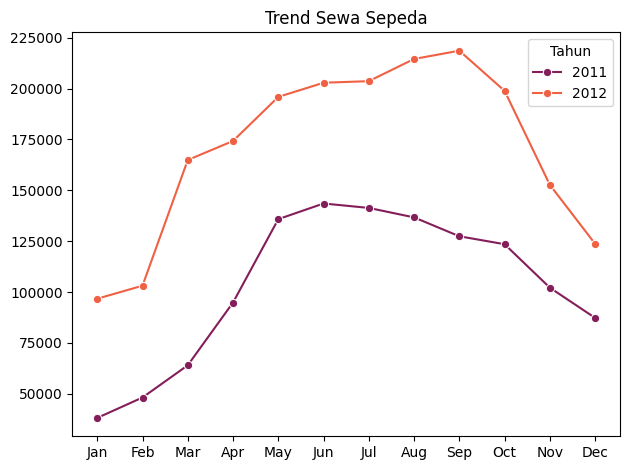

In [52]:
day_df['mnth'] = pd.Categorical(day_df['mnth'], categories=
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    ordered=True)

monthly_counts = day_df.groupby(by=["mnth","yr"]).agg({"cnt": "sum"}).reset_index()

sns.lineplot(data=monthly_counts, x="mnth",y="cnt", hue="yr", palette="rocket", marker="o")

plt.title("Trend Sewa Sepeda")
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

### Pertanyaan 2: Bagaimana pola perbandingan penyewaan sepeda harian?

<ipython-input-53-c9686a80166a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


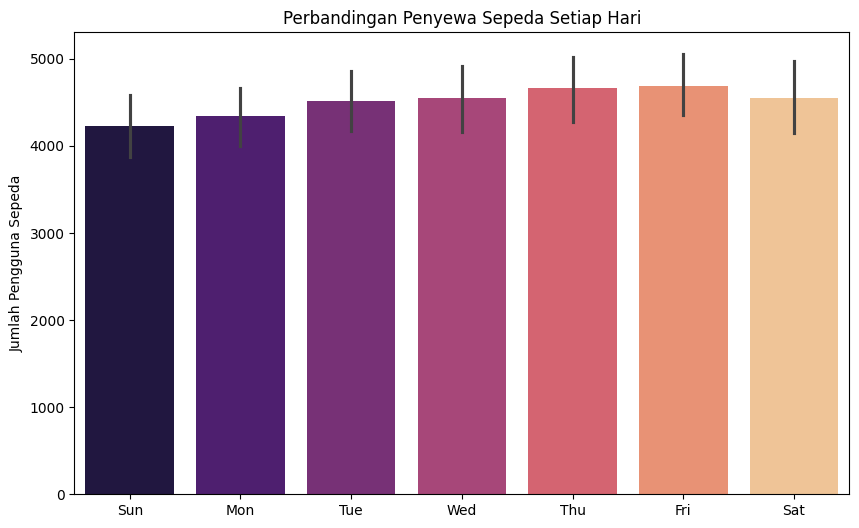

In [53]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='weekday',
    y='cnt',
    data=day_df,
    order=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'],
    palette='magma')

plt.title('Perbandingan Penyewa Sepeda Setiap Hari')
plt.xlabel(None)
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

### Pertanyaan 3: Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?

<ipython-input-54-67b200b2b43a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_pattern = day_df.groupby('season')[['registered', 'casual']].sum().reset_index()


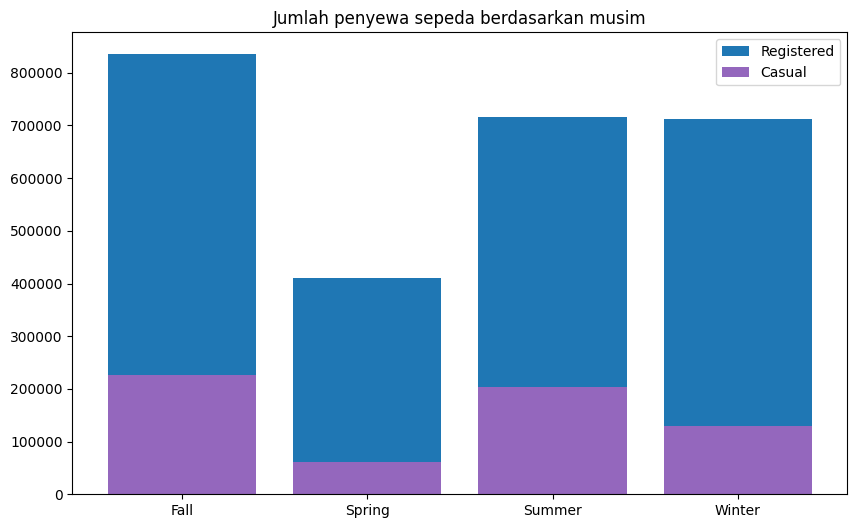

In [54]:
season_pattern = day_df.groupby('season')[['registered', 'casual']].sum().reset_index()

urutan_musim = ['spring', 'summer', 'fall', 'winter']

plt.figure(figsize=(10, 6))

plt.bar(season_pattern['season'],
        season_pattern['registered'],
        label='Registered', color='tab:blue')

plt.bar(season_pattern['season'],
        season_pattern['casual'],
        label='Casual', color='tab:purple')

plt.xlabel(None)
plt.ylabel(None)
plt.title('Jumlah penyewa sepeda berdasarkan musim')
plt.legend()
plt.show()

## Conclusion

- Conclution pertanyaan 1 : Tren penyewaan sepeda pengalami peningkatan dari tahun 2011 ke tahun 2012. Peningkatan tersebut dimulai pada bulan Mei hingga September dan terjadi penurunan pada akhir dan awal tahun.
- Conclution pertanyaan 2 : Jumlah penyewaan sepeda cenderung meningkat secara bertahap sepanjang hari kerja (dari hari Senin hingga Jumat) dengan  puncaknya pada hari Jumat. Kemudian, jumlah penyewaan sepeda mengalami penurun pada akhir pekan (hari Minggu). Hal ini mengindikasikan bahwa sepeda lebih sering digunakan untuk kegiatan rutin sehari-hari seperti pergi bekerja atau sekolah, dibandingkan untuk rekreasi pada hari libur.
- Conclution pertanyaan 3 : Jumlah penyewaan sepeda mengalami kenaikan secara bertahap seiring pergantian musim. Pada musim semi tercatat angka penyewaan terendah, sementara musim panas dan gugur menjadi puncak popularitas bersepeda. Setelah itu, terjadi sedikit penurunan jumlah penyewaan di musim dingin.

In [55]:
!pip install streamlit

In [56]:
! wget -q -O - ipv4.icanhazip.com

104.196.164.174


In [ ]:
! streamlit run dashboard.py & npx localtunnel --port 8501



⠙⠹⠸⠼⠴⠦
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://104.196.164.174:8501

your url is: https://whole-beans-drop.loca.lt
/content/dashboard.py:108: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trend_bike = day_df.groupby(by='yr').agg({'cnt': 'mean'})
/content/dashboard.py:114: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  st.dataframe(day_df.groupby(by='weekday').agg({
/content/dashboard.py:120: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version 